<h1>1.读取认证信息和租户信息</h1>
认证信息不需要在每次调用接口时都去通过登录重新获取，认证信息的有效时间是7天，因此在7天内都可以重复使用，可以直接读取user_info.json中保存的认证信息。

In [ ]:
import json

with open('user_info.json', 'r', encoding='utf-8') as f:
    payload = json.load(f)

token=payload["token"]
tenantId=payload["tenantId"]
print("认证信息：",token)
print("租户信息：",tenantId)

## 水质模拟预测分析
- 获取微生物生长模拟结果

In [ ]:
from dhicn_wwtp_data_bus_service import *

# 设置变量
product_line='1A'
start_time='2023-05-10 16:56:00'
end_time='2023-05-12 16:56:00'
model_name='在线滚动模型'

# 初始化ApiClient-污水业务服务

configuration=Configuration.get_default_copy()
configuration.host="https://online-products.dhichina.cn/gateway/wwtp-paas-main-bus-service" 

api_client=ApiClient(configuration)
api_client.set_default_header('Authorization',token)
api_client.set_default_header('tenantId',tenantId)

# 构建参数

param={
'product_line':product_line,
'start_time':start_time,
'end_time':end_time,
'model_name':model_name
}

# 调用接口

wq_analysis_instance=WQAnalysisApi(api_client)
response=wq_analysis_instance.v2_wq_analysis_micro_organism_get(**param)

print(response)

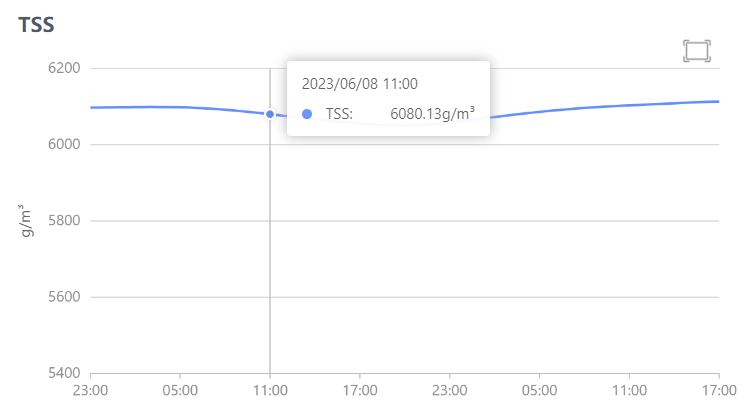